In [1]:
from google.colab import drive
drive.mount('/content/drive')

!git clone https://github.com/hyeshik/colab-biolab.git
!cd colab-biolab && bash tools/setup.sh
exec(open('colab-biolab/tools/activate_conda.py').read())

!conda install -y subread

%cd /content/drive/MyDrive/binfo1-datapack1/

Mounted at /content/drive
Cloning into 'colab-biolab'...
remote: Enumerating objects: 76, done.
remote: Counting objects: 100% (76/76), done.
remote: Compressing objects: 100% (47/47), done.
remote: Total 76 (delta 26), reused 59 (delta 15), pack-reused 0
Unpacking objects: 100% (76/76), 318.14 KiB | 3.06 MiB/s, done.
./
./root/
./root/.condarc
./root/.bashrc.biolab
./root/.vimrc
./root/.bin.priority/
./root/.bin.priority/pip
./root/.bin.priority/pip2
./root/.bin.priority/pip3
./root/.tmux.conf
./root/.profile
--2023-06-01 12:59:27--  https://repo.anaconda.com/miniconda/Miniconda3-latest-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.130.3, 104.16.131.3, 2606:4700::6810:8203, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.130.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 73134376 (70M) [application/x-sh]
Saving to: ‘miniconda3.sh’

miniconda3.sh       100%[===================>]  69.75M   148MB/s    in 0.5s    

20

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


,Chr,Start,End,Strand,Length,CLIP-35L33G.bam,RNA-control.bam,RNA-siLin28a.bam,RNA-siLuc.bam,RPF-siLin28a.bam,RPF-siLuc.bam,clip_enrichment,rden_change
Geneid,,,,,,,,,,,,,
ENSMUSG00000102693.2,chr1,3143476,3144545,+,1070,0,0,0,0,0,0,NaN,NaN
ENSMUSG00000064842.3,chr1,3172239,3172348,+,110,0,0,0,0,0,0,NaN,NaN
ENSMUSG00000051951.6,chr1;chr1;chr1;chr1;chr1;chr1;chr1,3276124;3276746;3283662;3283832;3284705;349192...,3277540;3277540;3285855;3286567;3287191;349212...,-;-;-;-;-;-;-,6094,4,1,1,1,0,0,4.000000,NaN
ENSMUSG00000102851.2,chr1,3322980,3323459,+,480,3,0,0,0,0,0,inf,NaN
ENSMUSG00000103377.2,chr1,3435954,3438772,-,2819,0,0,0,0,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSMUSG00000064368.1,chrM,13552,14070,-,519,1666,1976,6741,8052,11471,10842,0.843117,1.263780
ENSMUSG00000064369.1,chrM,14071,14139,-,69,81,61,30,25,18,19,1.327869,0.789474
ENSMUSG00000064370.1,chrM,14145,15288,+,1144,403,4561,11885,10971,13872,11329,0.088358,1.130302


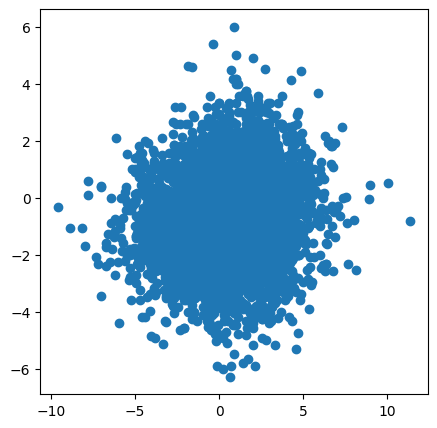

In [6]:
import pandas as pd
cnts = pd.read_csv('read-counts.txt', sep='\t', comment='#', index_col=0)

cnts['clip_enrichment'] = cnts['CLIP-35L33G.bam'] / cnts['RNA-control.bam']
cnts['rden_change'] = (cnts['RPF-siLin28a.bam'] / cnts['RNA-siLin28a.bam']) / (cnts['RPF-siLuc.bam'] / cnts['RNA-siLuc.bam'])

from matplotlib import pyplot as plt
import numpy as np

fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.scatter(np.log2(cnts['clip_enrichment']),
           np.log2(cnts['rden_change']))

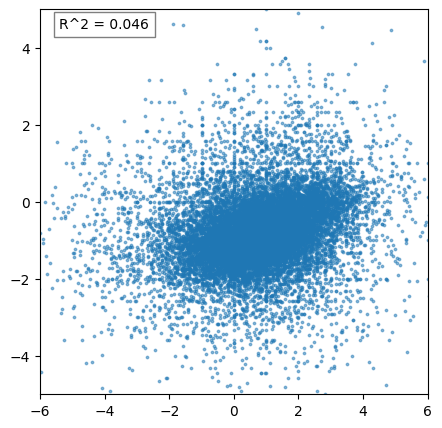

In [4]:
from matplotlib import pyplot as plt
import numpy as np
import matplotlib.transforms as transforms
from sklearn.metrics import r2_score

fig, ax = plt.subplots(1, 1, figsize=(5, 5))

mask = np.isfinite(np.log2(cnts['clip_enrichment'])) & np.isfinite(np.log2(cnts['rden_change']))

pseudocount = 1
x = np.log2(cnts['clip_enrichment'][mask] + pseudocount)
y = np.log2(cnts['rden_change'][mask] + pseudocount)
r = np.corrcoef(x, y)[0, 1]
r_squared = r ** 2

hb = ax.scatter(np.log2(cnts['clip_enrichment']),
           np.log2(cnts['rden_change']),
           s = 3,
           alpha = 0.5)


ax.set_xlim([-6,6])
ax.set_ylim([-5,5])

ax.text(0.05, 0.95, f'R^2 = {r_squared:.3f}', transform=ax.transAxes,
        bbox=dict(facecolor='white', alpha=0.5))

plt.show()

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


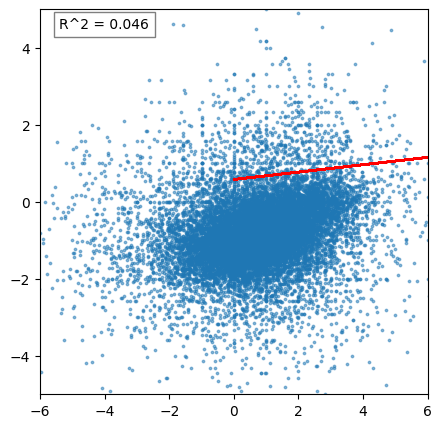

In [7]:
from matplotlib import pyplot as plt
import numpy as np
import matplotlib.transforms as transforms
from sklearn.metrics import r2_score

fig, ax = plt.subplots(1, 1, figsize=(5, 5))

mask = np.isfinite(np.log2(cnts['clip_enrichment'])) & np.isfinite(np.log2(cnts['rden_change']))

pseudocount = 1
x = np.log2(cnts['clip_enrichment'][mask] + pseudocount)
y = np.log2(cnts['rden_change'][mask] + pseudocount)
r = np.corrcoef(x, y)[0, 1]
r_squared = r ** 2

hb = ax.scatter(np.log2(cnts['clip_enrichment']),
           np.log2(cnts['rden_change']),
           s=3,
           alpha=0.5)

# Calculate regression line
coefficients = np.polyfit(x, y, 1)
regression_line = np.polyval(coefficients, x)

# Plot regression line
ax.plot(x, regression_line, color='red')

ax.set_xlim([-6, 6])
ax.set_ylim([-5, 5])

ax.text(0.05, 0.95, f'R^2 = {r_squared:.3f}', transform=ax.transAxes,
        bbox=dict(facecolor='white', alpha=0.5))

plt.show()

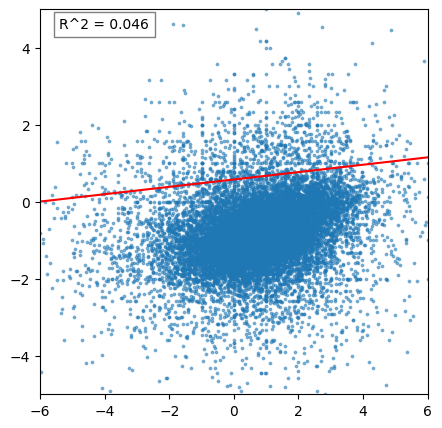

In [8]:
from matplotlib import pyplot as plt
import numpy as np
import matplotlib.transforms as transforms
from sklearn.metrics import r2_score

fig, ax = plt.subplots(1, 1, figsize=(5, 5))

mask = np.isfinite(np.log2(cnts['clip_enrichment'])) & np.isfinite(np.log2(cnts['rden_change']))

pseudocount = 1
x = np.log2(cnts['clip_enrichment'][mask] + pseudocount)
y = np.log2(cnts['rden_change'][mask] + pseudocount)
r = np.corrcoef(x, y)[0, 1]
r_squared = r ** 2

hb = ax.scatter(np.log2(cnts['clip_enrichment']),
           np.log2(cnts['rden_change']),
           s=3,
           alpha=0.5)

# Calculate regression line
coefficients = np.polyfit(x, y, 1)
regression_line_x = np.linspace(-6, 6, 100)  # Adjust the x-axis range as needed
regression_line_y = np.polyval(coefficients, regression_line_x)

# Plot regression line
ax.plot(regression_line_x, regression_line_y, color='red')

ax.set_xlim([-6, 6])
ax.set_ylim([-5, 5])

ax.text(0.05, 0.95, f'R^2 = {r_squared:.3f}', transform=ax.transAxes,
        bbox=dict(facecolor='white', alpha=0.5))

plt.show()


<ipython-input-9-12f89582943e>:24: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  regression_model.fit(x[:, np.newaxis], y)


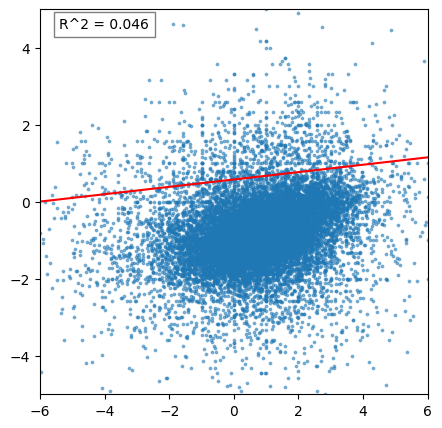

In [9]:
from matplotlib import pyplot as plt
import numpy as np
import matplotlib.transforms as transforms
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

fig, ax = plt.subplots(1, 1, figsize=(5, 5))

mask = np.isfinite(np.log2(cnts['clip_enrichment'])) & np.isfinite(np.log2(cnts['rden_change']))

pseudocount = 1
x = np.log2(cnts['clip_enrichment'][mask] + pseudocount)
y = np.log2(cnts['rden_change'][mask] + pseudocount)
r = np.corrcoef(x, y)[0, 1]
r_squared = r ** 2

hb = ax.scatter(np.log2(cnts['clip_enrichment']),
           np.log2(cnts['rden_change']),
           s=3,
           alpha=0.5)

# Fit linear regression model
regression_model = LinearRegression()
regression_model.fit(x[:, np.newaxis], y)

# Generate regression line values
regression_line_x = np.linspace(-6, 6, 100)  # Adjust the x-axis range as needed
regression_line_y = regression_model.predict(regression_line_x[:, np.newaxis])

# Plot regression line
ax.plot(regression_line_x, regression_line_y, color='red')

ax.set_xlim([-6, 6])
ax.set_ylim([-5, 5])

ax.text(0.05, 0.95, f'R^2 = {r_squared:.3f}', transform=ax.transAxes,
        bbox=dict(facecolor='white', alpha=0.5))

plt.show()